# Task

Given a system:

<!-- A =
    [0 0 1 0;
     0 0 0 1;
     n -2 -10/n -2;
     -5 -n/10 0 -3]; -->

$$
\begin{cases}
\dot x =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 10 & -2 & -1 & -2 \\
-5 & -1 & 0 & -3
\end{bmatrix}
x
+
\begin{bmatrix}
0 \\
0 \\
-1\\
1
\end{bmatrix}
u \\
y = \begin{bmatrix}
1 & 1 & 0 & 0
\end{bmatrix} x
\end{cases}
$$

where $n$ is your number in your group list (ask your TA to give you your number if you don't have one).



1.   Find its transfer function representation ($y(s) / u(s) = W(s)$).
1.   Propose an ODE representation of the system.
1.   Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.
1.   Show stability of the closed-loop system via eigenvalue analysis.
1.   Find stability margins by analysing Bode diagram for the system.
1.   Simulate closed-loop system.
1.   Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix}
2+0.1n \\
n-5 \\
0 \\
0
\end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.
1. Discretize the system with $\Delta t = 0.01$. Write equations of the discrete dinamics.
1. Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).
1. Show eigenvalue analisys of the slosed-loop dynamics of the discrete system (with the proposed discrete control law. Demonstrate stability.
1. Simulate the discrete system. Show graphs.


# Solution for $n$ = 10

## Task 1
Find its transfer function representation ($y(s) / u(s) = W(s)$).

### Solution 1
 We have state space representation where :


$
A = \begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 10 & -2 & -1 & -2 \\
-5 & -1 & 0 & -3
\end{bmatrix}, \quad
B = \begin{bmatrix}
0 \\
0 \\
-1\\
1
\end{bmatrix}, \quad
C = \begin{bmatrix}
1 & 1 & 0 & 0
\end{bmatrix}, \quad
D = \begin{bmatrix} 0 \end{bmatrix}
$

For computing tranfer function : $$ W(s) = C(sI - A)^{-1}B + D$$


Finding the inverse matrix:

$
sI - A =
\begin{bmatrix}
s & 0 & -1 & 0 \\
0 & s & 0 & -1 \\
 -10 & 2 & s+1 & 2 \\
5 & 1 & 0 & s+3
\end{bmatrix}
$

The determinant is:


$$
\det(sI - A) = s^4 + 4s^3 - 6s^2 - 39s - 20
$$

The inverse matrix:

$$
(sI - A)^{-1} \;=\; \frac{1}{\det(sI - A)}\,\mathrm{adj}\bigl(sI - A\bigr).
$$

  

$$ \mathrm{adj}\bigl(sI - A\bigr) =
\begin{pmatrix}
s^3 + 4s^2 + 4s + 1 & -2(s + 2) & s^2 + 3s + 1 & -2(s + 1) \\[6pt]
-5(s + 1) & s^3 + 4s^2 - 7s - 40 & -5 & s^2 + s - 10 \\[6pt]
10(s^2 + 4s + 2) & -2(s^2 + 2s) & s^3 + 3s^2 + s & -2(s^2 + s) \\[6pt]
-5(s^2 + s) & -s^2 + s + 20 & -5s & s^3 + s^2 - 10s
\end{pmatrix}
$$

The inverse matrix:

$$
(sI - A)^{-1} = \frac{1}{s^4 + 4s^3 - 6s^2 - 39s - 20} \begin{pmatrix}
s^3 + 4s^2 + 4s + 1 & -2(s + 2) & s^2 + 3s + 1 & -2(s + 1) \\[6pt]
-5(s + 1) & s^3 + 4s^2 - 7s - 40 & -5 & s^2 + s - 10 \\[6pt]
10(s^2 + 4s + 2) & -2(s^2 + 2s) & s^3 + 3s^2 + s & -2(s^2 + s) \\[6pt]
-5(s^2 + s) & -s^2 + s + 20 & -5s & s^3 + s^2 - 10s
\end{pmatrix}
$$

Multiply by B:

$$\frac{1}{\,s^4 + 4s^3 - 6s^2 - 39s - 20\,}
\begin{pmatrix}
-\,s^2 \;-\;5s \;-\;3\\[6pt]
s^2 \;+\; s \;-\;5\\[6pt]
-\,s^3 \;-\;5\,s^2 \;-\;3\,s\\[6pt]
s^3 \;+\; s^2 \;-\;5\,s
\end{pmatrix}$$

Multiply by C:

$$\frac{-4s-8}{\,s^4 + 4s^3 - 6s^2 - 39s - 20\,}
$$

### Answer 1
Finaly we get transfer function:

$$
\frac{-4s-8}{\,s^4 + 4s^3 - 6s^2 - 39s - 20\,}
$$

## Task 2

Propose an ODE representation of the system

### Solution 2


### As we find transfer function from previous task

$$
W(s) = \frac{Y(s)}{U(s)} = \frac{-4s - 8}{s^4 + 4s^3 - 6s^2 - 39s - 20}
$$

### From Transfer Function to Differential Equation

We use the rule:

$$
W(s) = \frac{Y(s)}{U(s)} = \frac{b_1 s + b_0}{s^4 + a_3 s^3 + a_2 s^2 + a_1 s + a_0}
$$

In the time domain, this corresponds to a differential equation of the form:

$$
y^{(4)} + a_3 y^{(3)} + a_2 \ddot{y} + a_1 \dot{y} + a_0 y = b_1 \dot{u} + b_0 u
$$

### Substituting Coefficients

From the transfer function:

- Numerator:
  $$
  -4s - 8 \quad \Rightarrow \quad b_1 = -4,\quad b_0 = -8
  $$
- Denominator:
  $$
  s^4 + 4s^3 - 6s^2 - 39s - 20 \quad \Rightarrow \quad a_3 = 4,\quad a_2 = -6,\quad a_1 = -39,\quad a_0 = -20
  $$

### Final Differential Equation

$$
y^{(4)} + 4y^{(3)} - 6\ddot{y} - 39\dot{y} - 20y = -4\dot{u} - 8u
$$

## Task 3

Propose a controller (control law $u = -Kx$) that makes the system stable. Do it via pole placement and as an LQR. For LQR show the cost function you chose.

### Solution 3

Let's solve and find control law $u = -Kx$ using pole placement algorithm:

We have $$A = \begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 10 & -2 & -1 & -2 \\
-5 & -1 & 0 & -3
\end{bmatrix}, \quad
B = \begin{bmatrix}
0 \\
0 \\
-1\\
1
\end{bmatrix}
$$
General system: $$\dot x = Ax + Bu$$
$$u = -Kx$$
$$\dot x = (A - BK)x$$

For stable system (A - BK) must have eigenvalues <= 0.

Let $λ= [−2,−3,−4,−5]$

For computing control matrix I use python code:

In [2]:
import numpy as np
from scipy.signal import place_poles

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [10, -2, -1, -2],
              [-5, -1, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])


poles = [-2, -3, -4, -5]


place_obj = place_poles(A, B, poles)
K = place_obj.gain_matrix

print("K =", K)


K = [[-33.75  -7.75 -10.25  -0.25]]


Let's solve and find control law $u = -Kx$ using  LQR:

The cost function minimized in LQR is:

$$
J = \int_0^{\infty} \left( x^T Q x + u^T R u \right) dt
$$

We can choose to penalize all state variables (full-state control), or we can focus only on the output we care about, which may help reduce energy usage and make the control more efficient.:
$$y = \begin{bmatrix}
1 & 1 & 0 & 0
\end{bmatrix} x$$

This means the output only depends on the combination $x_1+x_2$ and not on the rest of the state. So, we can choose to penalize only this output.


$$
  Q = C^T C =
  \begin{bmatrix}
  1 & 1 & 0 & 0
  \end{bmatrix}^T
  \begin{bmatrix}
  1 & 1 & 0 & 0
  \end{bmatrix}
  =
  \begin{bmatrix}
  1 & 1 & 0 & 0 \\
  1 & 1 & 0 & 0 \\
  0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0
  \end{bmatrix}
  $$

  As we have only one input:
  $$ R = \begin{bmatrix}
  1
  \end{bmatrix}$$

 Increasing the values in matrix
$Q$ leads to faster convergence, as it places greater emphasis on minimizing state deviations, so we can increase values.

Cost function computation:
$$
x^T Q x =
\begin{bmatrix}
x_1 & x_2 & x_3 & x_4
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
=
x_1^2 + 2x_1 x_2 + x_2^2
$$


$$
u^T R u = u^2
$$

Finaly:
$$
J = \int_0^\infty \left( x_1^2 + 2x_1 x_2 + x_2^2 + u^2 \right) dt
$$


I use python code for finding K and eiginevalues to be sure that system stable :

In [14]:

from scipy.linalg import solve_continuous_are


Q = np.array([[1, 1, 0, 0],
              [1, 1, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])

R = np.array([[1]])

A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [10, -2, -1, -2],
              [-5, -1, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])



S = solve_continuous_are(A, B, Q, R)


K_lqr = np.linalg.inv(R) @ B.T @ S

A_cl = A - B @ K_lqr
eigvals = np.linalg.eigvals(A_cl)

print("Eigenvalues of (A - BK):", eigvals)

print("K_lqr =", K_lqr)


Eigenvalues of (A - BK): [-0.62702679+0.j         -3.19503809+1.02747428j -3.19503809-1.02747428j
 -3.04987007+0.j        ]
K_lqr = [[-17.27219148   2.05518304  -4.31940638   1.74756666]]


As we can see - real part of all eigenvalues negative, so system with matrix Q and R as we choose is stable.

## Task 4
Show stability of the closed-loop system via eigenvalue analysis.

### Solution 4
In the previous task we know that system via pole placement is stable, cause we choose negative eigenvalues by ourself.

For LQR we get matrix K. For show stability of closed-loop system we need to find eigenvalues of matrix $A_BK$ and if it real part negative - system stable. But in previous task I already done it. For Matrix Q and R $$Q =  \begin{bmatrix}
  1 & 1 & 0 & 0 \\
  1 & 1 & 0 & 0 \\
  0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0
  \end{bmatrix}, \quad
  R =
  \begin{bmatrix}1
  \end{bmatrix}$$

  I got eginevalues $$[λ_1 = -0.62702679+0.j,λ_2 = -3.19503809+1.02747428j,λ_3 = -3.19503809-1.02747428j, λ_4 = -3.04987007+0.j]$$

  As we can see, real part of all $λ$ is negative, so our system is stable!


  ## Task 5
  Find stability margins by analysing Bode diagram for the system.

  ### Solution 5


In [2]:
!pip install control slycot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 27.8 MB/s eta 0:00:00
  Created wheel for slycot: filename=slycot-0.6.0-cp311-cp311-linux_x86_64.whl size=2020982 sha256=26b484740ceb08ac470fdc3fa06a4e9f628c34606927c70e416c5ca1fd595627
  Stored in directory: /root/.cache/pip/wheels/d5/87/ac/940d8a47d96bfc14450a1ea8c348711fe370046f8b3976de7c
Successfully built slycot


/usr/local/lib/python3.11/dist-packages/control/config.py:363: FutureWarning: keyword 'margins' is deprecated; use 'display_margins'
  warnings.warn(


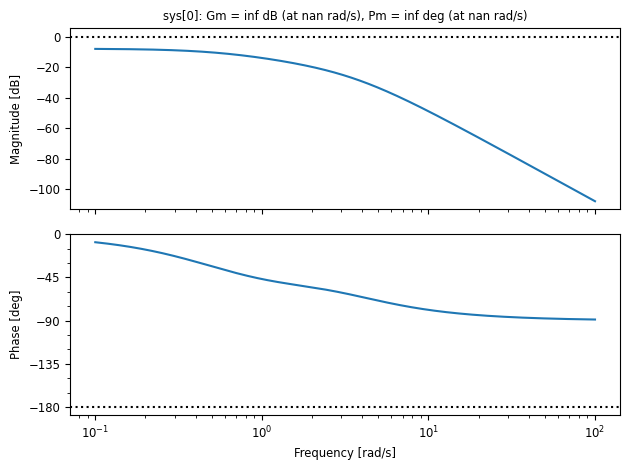

Gain margin: inf
Phase margin: inf degrees
Gain crossover frequency: nan rad/s
Phase crossover frequency: nan rad/s


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control

num = [-4, -8]
den = [1, 4, -6, -39, -20]


W = control.tf(num, den)


control.bode_plot(W, dB=True, deg=True, margins=True)
plt.show()


gm, pm, wg, wp = control.margin(W)
print("Gain margin:", gm)
print("Phase margin:", pm, "degrees")
print("Gain crossover frequency:", wg, "rad/s")
print("Phase crossover frequency:", wp, "rad/s")




### Observations and Conclusions:

Function of feedback is:
$$\frac{G(s)}{1 + G(s)}$$

In result we have infinty in gain and phase margin, it means that system feedback tend to 1, hence system is stable. "Nan" means that the system never investigate 0 dB and -180 degrees.

## Task 6
Simulate closed-loop system.

### Solution 6

For simulation closed-loop system let's find some initial state $x_0$ and then solve system  $$\dot x(t) = (A-BK)x(t)$$

Let's take matrix K from task 2 from LQR: $$K = \begin{bmatrix} -17.27 &  2.06 &-4.32 & 1.75\end{bmatrix}$$

Let's $x_0 = \begin{bmatrix} 1 &  0 &0 & 0\end{bmatrix}$

Simulation:

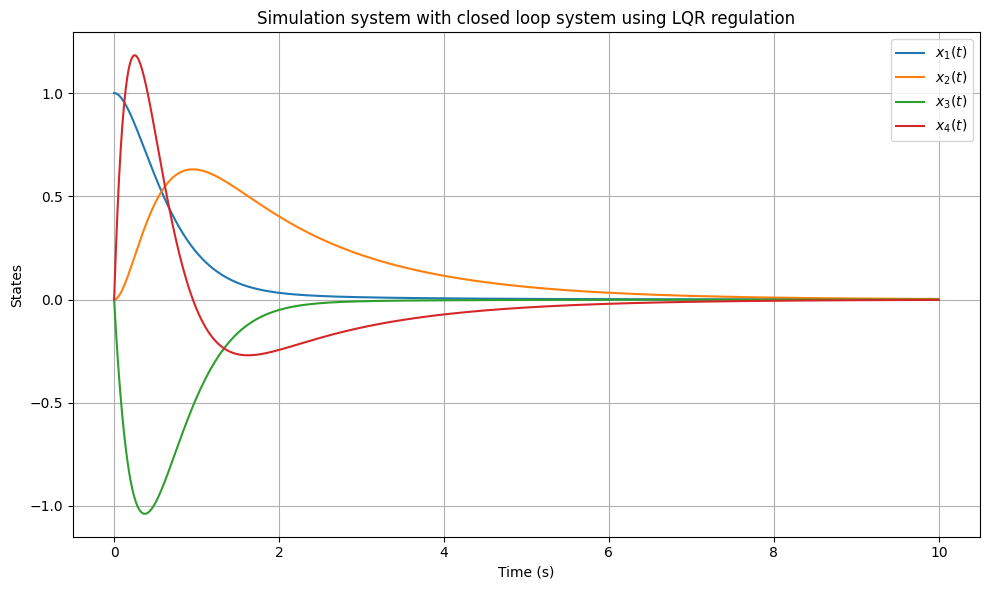

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [10, -2, -1, -2],
              [-5, -1, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

K = np.array([[-17.27, 2.06, -4.32, 1.75]])


A_cl = A - B @ K
x0 = np.array([1, 0, 0, 0])

t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)


def closed_loop_dynamics(t, x):
    return A_cl @ x

sol = solve_ivp(closed_loop_dynamics, t_span, x0, t_eval=t_eval)


plt.figure(figsize=(10, 6))
for i in range(sol.y.shape[0]):
    plt.plot(sol.t, sol.y[i], label=f'$x_{i+1}(t)$')
plt.title('Simulation system with closed loop system using LQR regulation')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Task 7
Modify the control law in such a way that the state of the system converges to $x_0 = \begin{bmatrix}
3 \\
5 \\
0 \\
0
\end{bmatrix}$. Show resulting control law. Simulate the system and demostrate convergence via graphs of state dynamics and error dynamics.

### Solution 7
Modify the control law in such a way that the state of the system converges to
$$
x^* = \begin{bmatrix}
3 \\
5 \\
0 \\
0
\end{bmatrix}
$$

### Control Law with Feedforward

We define the control law:

$$
u = K(x^* - x) + u^*
$$

where:
- $( x^* ) $is the desired state,
- $( u^* $) is the feedforward term that ensures stationarity at $( x = x^* $).

From the stationarity condition:
$$
Ax^* + Bu^* = 0 \quad \Rightarrow \quad u^* = -B^+Ax^*
$$

where $( B^+ $) is the Moore–Penrose pseudoinverse of B

Thus, the full control law becomes:

$$
u = K(x^* - x) - B^+Ax^*
$$


First, let's find $B^+$ and $u^*$


In [12]:


A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [10, -2, -1, -2],
              [-5, -1, 0, -3]])

B = np.array([[0],
              [0],
              [-1],
              [1]])

n = 10
x_star = np.array([[2 + 0.1 * n],
                   [n - 5],
                   [0],
                   [0]])

B_pinv = np.linalg.pinv(B)
u_star = -B_pinv @ (A @ x_star)
print(B_pinv)


[[ 0.   0.  -0.5  0.5]]


Now we need to determine matrix K. I take it from task 2 from LQR
$$K = \begin{bmatrix} -17.27 &  2.06 &-4.32 & 1.75\end{bmatrix}$$

Resulting control law:

$$u = \begin{bmatrix} -17.27 &  2.06 &-4.32 & 1.75\end{bmatrix}(\begin{bmatrix}
3 \\
5 \\
0 \\
0
\end{bmatrix} - x) - \begin{bmatrix} 0 &  0 & -0.5 & 0.5\end{bmatrix}\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
 10 & -2 & -1 & -2 \\
-5 & -1 & 0 & -3
\end{bmatrix}\begin{bmatrix}
3 \\
5 \\
0 \\
0
\end{bmatrix}$$

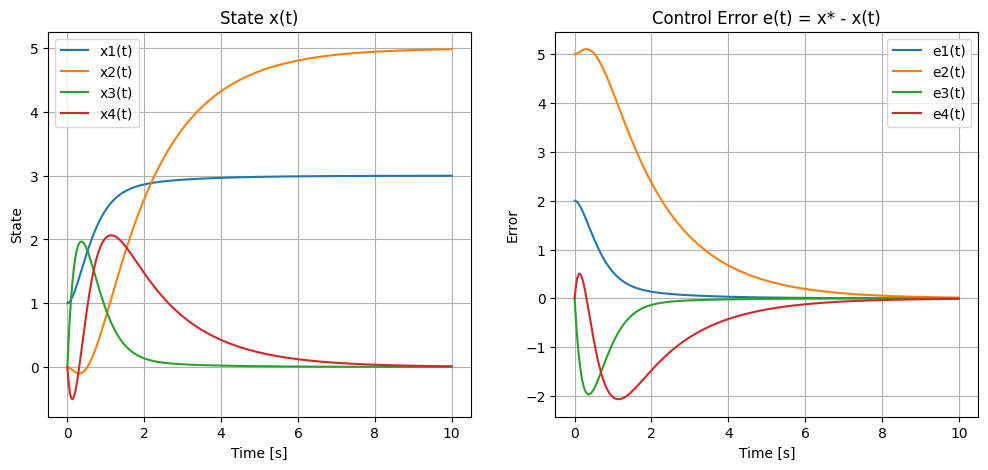

In [11]:
K = np.array([[-17.27, 2.06, -4.32, 1.75]])


A_cl = A - B @ K
B_cl = B @ K @ x_star + B @ u_star

def closed_loop_dynamics(t, x):
    x = x.reshape((-1, 1))
    dxdt = A_cl @ x + B_cl
    return dxdt.flatten()


x0 = np.array([1, 0, 0, 0])
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 300)

sol = solve_ivp(closed_loop_dynamics, t_span, x0, t_eval=t_eval)
x_t = sol.y.T


e_t = x_star.T - x_t

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(4):
    plt.plot(t_eval, x_t[:, i], label=f'x{i+1}(t)')
plt.title("State x(t)")
plt.xlabel("Time [s]")
plt.ylabel("State")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
for i in range(4):
    plt.plot(t_eval, e_t[:, i], label=f'e{i+1}(t)')
plt.title("Control Error e(t) = x* - x(t)")
plt.xlabel("Time [s]")
plt.ylabel("Error")
plt.legend()
plt.grid()


plt.show()



As result we can see that our states converge to $$x_0 = \begin{bmatrix}
3 \\
5 \\
0 \\
0
\end{bmatrix} $$ and errors converge to 0

## Task 8
Discretize the system with  Δ𝑡=0.01 . Write equations of the discrete dinamics

### Solution 8

We convert the continuous-time system:

$$
\dot{x}(t) = Ax(t) + Bu(t)
$$

into a discrete-time form:

$$x_{k+1} = \bar{A} x_k + \bar{B} u_k$$

$$\bar{A} = A \cdot \Delta t + I, \quad \bar{B} = B \cdot \Delta t$$

Where I - identity 4*4 matrix and Δ𝑡=0.01
- Calculate matrix $\bar{A}$

$$\bar{A} =
\begin{bmatrix}
1 & 0 & 0.01 & 0 \\
0 & 1 & 0 & 0.01 \\
0.1 & -0.02 & 0.99 & -0.02 \\
-0.05 & -0.01 & 0 & 0.97
\end{bmatrix}$$

- Calculate matrix $\bar{B}$

$$\bar{B} =
\begin{bmatrix}
0 \\
0 \\
-0.01 \\
0.01
\end{bmatrix}$$

Discrete system $$x_{k+1} =
\begin{bmatrix}
1 & 0 & 0.01 & 0 \\
0 & 1 & 0 & 0.01 \\
0.1 & -0.02 & 0.99 & -0.02 \\
-0.05 & -0.01 & 0 & 0.97
\end{bmatrix} x_k +
\begin{bmatrix}
0 \\
0 \\
-0.01 \\
0.01
\end{bmatrix} u_k$$

## Task 9
Propose a control law for the discrete system via pole-placement and LQR (show cost function for the LQR).

### Solution 9

Let's solve and find control law $u_k = -Kx_k$ using pole placement algorithm:

We have $$A = \begin{bmatrix}
1 & 0 & 0.01 & 0 \\
0 & 1 & 0 & 0.01 \\
0.1 & -0.02 & 0.99 & -0.02 \\
-0.05 & -0.01 & 0 & 0.97
\end{bmatrix}, \quad
B = \begin{bmatrix}
0 \\
0 \\
-0.01\\
0.01
\end{bmatrix}
$$
General system: $$x_{k+1} = Ax_k + Bu_k$$
$$u_k = -Kx_k$$
$$ x_{k+1} = (A - BK)x_k$$



Let $λ= [−2,−3,−4,−5]$

$z = e^{Δ𝑡λ}$ in discrete system

For stable system |z| < 1

For computing control matrix I use python code:

In [22]:
import numpy as np
from scipy.signal import place_poles

A = np.array([[1, 0, 0.01, 0],
              [0, 1, 0, 0.01],
              [0.1, -0.02, 0.99, -0.02],
              [-0.05, -0.01, 0, 0.97]])

B = np.array([[0],
              [0],
              [-0.01],
              [0.01]])


z = [0.98, 0.97, 0.96, 0.95]


place_obj = place_poles(A, B, z)
K = place_obj.gain_matrix

print("K =", K)


K = [[-33.75  -7.75 -10.25  -0.25]]


Matrix K for pole placament $$
K = \begin{bmatrix}
-33.75 & -7.75 & 10.25 & -0.25
\end{bmatrix}
$$

Find matrix K via LQR

For the discrete-time LQR problem, the cost function is given by:
$$J = \sum_{k=0}^{\infty} \left( x_k^T Q x_k + u_k^T R u_k \right)$$

In [25]:

from scipy.linalg import solve_discrete_are
from numpy.linalg import inv

A = np.array([
    [1, 0, 0.01, 0],
    [0, 1, 0, 0.01],
    [0.1, -0.02, 0.99, -0.02],
    [-0.05, -0.01, 0, 0.97]
])

B = np.array([
    [0],
    [0],
    [-0.01],
    [0.01]
])


Q = np.array([[1, 1, 0, 0],
              [1, 1, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])

R = np.array([[1]])


P = solve_discrete_are(A, B, Q, R)


K = inv(B.T @ P @ B + R) @ (B.T @ P @ A)



print("K =", K)


K = [[-17.01783685   2.02943472  -4.25596283   1.72289941]]


Matrix K for LQR $$
K = \begin{bmatrix}
-17.02 & 2.03 & -4.25 & 1.72
\end{bmatrix}
$$

## Task 10
Show eigenvalue analisys of the slosed-loop dynamics of the discrete system (with the proposed discrete control law). Demonstrate stability.

### Solution 10


The system is **stable** if all eigenvalues $ z_i $ of the matrix ( A - BK ) satisfy:

$
|z_i| < 1
$

In [30]:

from numpy.linalg import inv, eigvals

A_cl = A - B @ K
z = eigvals(A_cl)

print("Eigenvalues (A - BK):", z)



Eigenvalues (A - BK): [0.9937306 +0.j         0.96802647+0.01026303j 0.96802647-0.01026303j
 0.97042783+0.j        ]



$$
|0.9937| = 0.9937
$$

$$
|0.9680 \pm 0.0102j| \approx \sqrt{0.968^2 + 0.0102^2} \approx 0.9681
$$

$$
|0.9704| = 0.9704
$$

All moduls are **less than 1**, so the system is **stable**